**Table of contents**<a id='toc0_'></a>    
- [Be My Guest - Recruit Restaurant EDA](#toc1_)    
  - [Load Data](#toc1_1_)    
  - [EDA](#toc1_2_)    
    - [File Structure & Content Overview](#toc1_2_1_)    
      - [Air Reserve](#toc1_2_1_1_)    
      - [HPG Reserve](#toc1_2_1_2_)    
      - [Air Visits](#toc1_2_1_3_)    
      - [Air Store](#toc1_2_1_4_)    
      - [HPG Store](#toc1_2_1_5_)    
      - [Holidays](#toc1_2_1_6_)    
      - [Store ID Relation](#toc1_2_1_7_)    
      - [Test Data](#toc1_2_1_8_)    
    - [Reformat Features](#toc1_2_2_)    
    - [Feature Visualizations](#toc1_2_3_)    
      - [Air Visits](#toc1_2_3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Be My Guest - Recruit Restaurant EDA](#toc0_)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## <a id='toc1_1_'></a>[Load Data](#toc0_)

In [2]:
air_reserve_df = pd.read_csv('./input/recruit-restaurant-visitor-forecasting/air_reserve.csv')
air_visits_df = pd.read_csv('./input/recruit-restaurant-visitor-forecasting/air_visit_data.csv')
air_store_df = pd.read_csv('./input/recruit-restaurant-visitor-forecasting/air_store_info.csv')
hpg_reserve_df = pd.read_csv('./input/recruit-restaurant-visitor-forecasting/hpg_reserve.csv')
hpg_store_df = pd.read_csv('./input/recruit-restaurant-visitor-forecasting/hpg_store_info.csv')
holidays_df = pd.read_csv('./input/recruit-restaurant-visitor-forecasting/date_info.csv')
store_ids_df = pd.read_csv('./input/recruit-restaurant-visitor-forecasting/store_id_relation.csv')
test_df = pd.read_csv('./input/recruit-restaurant-visitor-forecasting/sample_submission.csv')

## <a id='toc1_2_'></a>[EDA](#toc0_)

### <a id='toc1_2_1_'></a>[File Structure & Content Overview](#toc0_)

#### <a id='toc1_2_1_1_'></a>[Air Reserve](#toc0_)


This file contains reservations made in the air system. Note that the reserve_datetime indicates the time when the reservation was created, whereas the visit_datetime is the time in the future where the visit will occur.

air_store_id - the restaurant's id in the air system\
visit_datetime - the time of the reservation\
reserve_datetime - the time the reservation was made\
reserve_visitors - the number of visitors for that reservation

In [4]:
air_reserve_df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [35]:
air_reserve_df.describe()

air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

In [22]:
print("Max air reserve visit datetime: ", air_reserve_df['visit_datetime'].max())
print("Min air reserve visit datetime: ", air_reserve_df['visit_datetime'].min())
print("Max air reserve visitors: ", air_reserve_df['reserve_visitors'].max())
print("Min air reserve visitors: ", air_reserve_df['reserve_visitors'].min())

Max air reserve visit datetime:  2017-05-31 21:00:00
Min air reserve visit datetime:  2016-01-01 19:00:00
Max air reserve visitors:  100
Min air reserve visitors:  1


#### <a id='toc1_2_1_2_'></a>[HPG Reserve](#toc0_)


This file contains reservations made in the hpg system.

hpg_store_id - the restaurant's id in the hpg system\
visit_datetime - the time of the reservation\
reserve_datetime - the time the reservation was made\
reserve_visitors - the number of visitors for that reservation

In [5]:
hpg_reserve_df.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [7]:
hpg_reserve_df.describe()

,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


In [36]:
print("Max hpg reserve visit datetime: ", hpg_reserve_df['visit_datetime'].max())
print("Min hpg reserve visit datetime: ", hpg_reserve_df['visit_datetime'].min())
print("Max hpg reserve visitors: ", hpg_reserve_df['reserve_visitors'].max())
print("Min hpg reserve visitors: ", hpg_reserve_df['reserve_visitors'].min())

Max hpg reserve visit datetime:  2017-05-31 23:00:00
Min hpg reserve visit datetime:  2016-01-01 11:00:00
Max hpg reserve visitors:  100
Min hpg reserve visitors:  1


#### <a id='toc1_2_1_3_'></a>[Air Visits](#toc0_)

This file contains historical visit data for the air restaurants.

air_store_id
visit_date - the date
visitors - the number of visitors to the restaurant on the date

In [6]:
air_visits_df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [10]:
air_visits_df.describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


In [12]:
print("Max Air Visits datetime: ", air_visits_df['visit_date'].max())
print("Min Air Visits datetime: ", air_visits_df['visit_date'].min())
print("Max reserve visitors: ", air_visits_df['visitors'].max())
print("Min reserve visitors: ", air_visits_df['visitors'].min())

Max Air Visits datetime:  2017-04-22
Min Air Visits datetime:  2016-01-01
Max reserve visitors:  877
Min reserve visitors:  1


#### <a id='toc1_2_1_4_'></a>[Air Store](#toc0_)

This file contains information about select air restaurants. Column names and contents are self-explanatory.

air_store_id\
air_genre_name\
air_area_name\
latitude\
longitude

In [44]:
air_store_df.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [46]:
air_store_df.describe()

,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


#### <a id='toc1_2_1_5_'></a>[HPG Store](#toc0_)

This file contains reservations made in the hpg system.

hpg_store_id - the restaurant's id in the hpg system\
visit_datetime - the time of the reservation\
reserve_datetime - the time the reservation was made\
reserve_visitors - the number of visitors for that reservation

In [17]:
hpg_store_df.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [18]:
hpg_store_df.describe()

,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


#### <a id='toc1_2_1_6_'></a>[Holidays](#toc0_)

This file gives basic information about the calendar dates in the dataset.

calendar_date\
day_of_week\
holiday_flg - is the day a holiday in Japan

In [19]:
holidays_df.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [20]:
holidays_df.describe()

,holiday_flg
count,517.000000
mean,0.067698
std,0.251471
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [22]:
print("Max calendar date: ", holidays_df['calendar_date'].max())
print("Min calendar date: ", holidays_df['calendar_date'].min())
print("Number of holidays: ", holidays_df['holiday_flg'].sum())

Max calendar date:  2017-05-31
Min calendar date:  2016-01-01
Number of holidays:  35


#### <a id='toc1_2_1_7_'></a>[Store ID Relation](#toc0_)

This file allows you to join select restaurants that have both the air and hpg system.\

hpg_store_id\
air_store_id

In [23]:
store_ids_df.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [24]:
store_ids_df.describe()

,air_store_id,hpg_store_id
count,150,150
unique,150,150
top,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
freq,1,1


#### <a id='toc1_2_1_8_'></a>[Test Data](#toc0_)

In [25]:
test_df.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [26]:
test_df.describe()

,visitors
count,32019.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


### <a id='toc1_2_2_'></a>[Reformat Features](#toc0_)

In [56]:
air_visits_df['visit_date'] = pd.to_datetime(air_visits_df['visit_date'], format="%Y/%m/%d")
air_reserve_df['visit_datetime'] = pd.to_datetime(air_reserve_df['visit_datetime'], format="%Y/%m/%d %H:%M:%S")
air_reserve_df['reserve_datetime'] = pd.to_datetime(air_reserve_df['reserve_datetime'], format="%Y/%m/%d %H:%M:%S")
hpg_reserve_df['visit_datetime'] = pd.to_datetime(hpg_reserve_df['visit_datetime'], format="%Y/%m/%d %H:%M:%S")
hpg_reserve_df['reserve_datetime'] = pd.to_datetime(hpg_reserve_df['reserve_datetime'], format="%Y/%m/%d %H:%M:%S")
air_store_df['air_genre_name'] = pd.Categorical(air_store_df['air_genre_name'])
hpg_store_df['hpg_genre_name'] = pd.Categorical(hpg_store_df['hpg_genre_name'])
holidays_df['calendar_date'] = pd.to_datetime(holidays_df['calendar_date'], format="%Y/%m/%d")
holidays_df['holiday_flg'] = holidays_df['holiday_flg'].astype('bool')
holidays_df['day_of_week'] = holidays_df['day_of_week'].astype('str')

### <a id='toc1_2_3_'></a>[Feature Visualizations](#toc0_)

#### <a id='toc1_2_3_1_'></a>[Air Visits](#toc0_)

In [110]:
#Group the data by its visit date since there are multiple instances of the column & combine the visitors column by summing.
p1 = air_visits_df.groupby('visit_date', as_index=False).agg({'visitors': 'sum'})
#p1 = air_visits_df.groupby('visit_date', as_index=False)['visitors'].sum() #both are equivalent

In [112]:
p1.head()

,visit_date,visitors
0,2016-01-01,1033
1,2016-01-02,1764
2,2016-01-03,2368
3,2016-01-04,3326
4,2016-01-05,3927


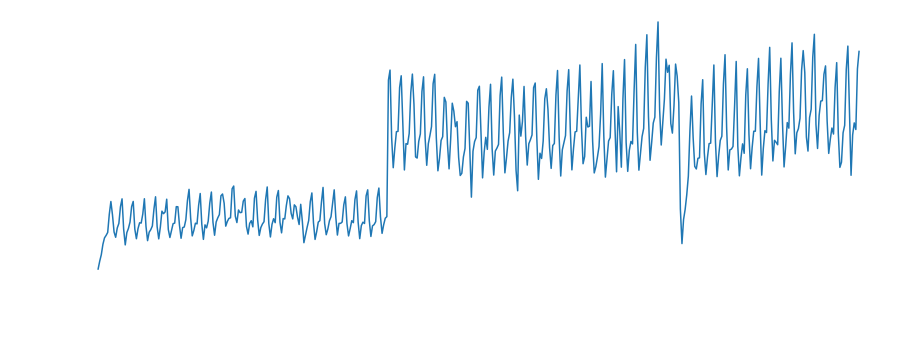

In [114]:

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (15,5)
sns.lineplot(x='visit_date', y='visitors', data=p1)
plt.xticks(rotation=50)
plt.show()

<AxesSubplot:xlabel='visitors_logarithmic', ylabel='Count'>

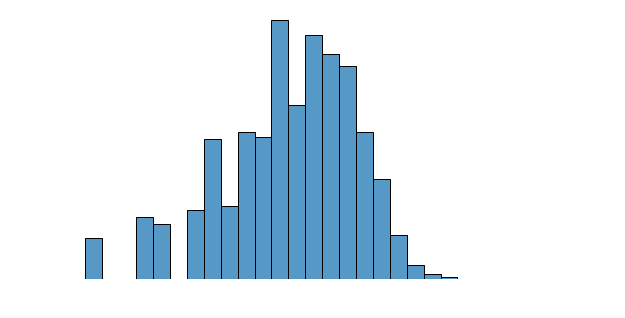

In [134]:
plt.rcParams["figure.figsize"] = (10,5)
#since the visitors column has a very wide range of values, we'll visualize the distribution in a logarithmic scale.
air_visits_df['visitors_logarithmic'] = np.log10(air_visits_df['visitors'])
sns.histplot(x='visitors_logarithmic', data=air_visits_df, bins=30)